In [1]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.generate_phrases import generate_random_phrase, generate_random_phrase_with_mutation, alphabet

In [3]:
def generate_phrases(phrase, u=0.1, gen_max=1e7):
    for letter in phrase:
        if letter not in alphabet:
            raise ValueError(f"Letter {letter} not in alphabet")
    
    phrase_size = len(phrase)
    gen = 0
    initial_phrase = generate_random_phrase(phrase_size, alphabet)
    new_phrase = initial_phrase
    reached = False
    while True:
        if new_phrase == phrase:
            reached = True

        if new_phrase == phrase or gen >= gen_max:
            break
        new_phrase = generate_random_phrase_with_mutation(initial_phrase, alphabet=alphabet, u=u)
        gen += 1
    return initial_phrase, {"gen": gen, "reached": reached}


In [4]:
def plot_graphs_and_describe(full_gens, u_list):
    d = {}

    for i in range(len(full_gens)):
        d[f"U{u_list[i]}"] = full_gens[i]

    df = pd.DataFrame(d)

    print(df.describe())

    df.boxplot()
    plt.xticks(rotation=45)
    plt.show()

def run_exp(u_list, phrase, qntd_exp):
    print("Generating phrases for different mutation rates: \n", u_list)
    med_gens = []
    full_gens = []
    t1 = time.time()
    for u in u_list:
        gens = []
        t1_epoch = time.time()
        for i in range(qntd_exp):
            initial_phrase, gen = generate_phrases(phrase, u, gen_max=1e7)
            gens.append(gen.get("gen"))
            if not gen.get("reached"):
                print(f"This experiment {i} did not reach the phrase")
        t2_epoch = time.time()
        print(f"Mutation rate: {u:.2f} | Mean generations: {round(np.mean(gens), 2):,} | Time taken: {t2_epoch-t1_epoch:.2f}s")

        med_gens.append(np.mean(gens))
        full_gens.append(gens)
    t2 = time.time()
    print("Mean generations: ", med_gens)
    print("Time taken: ", t2-t1)

    plt.plot(u_list, med_gens)
    plt.plot(u_list, med_gens, '*')
    plt.ylabel("Mean generations")
    plt.xlabel("Mutation rate")
    plt.show()

    plot_graphs_and_describe(full_gens, u_list)

Took 397 generations to generate the phrase 'GAGCCC' from 'GGAACA'
Took 1,346 generations to generate the phrase 'GAGCCC' from 'CGAACA'
Took 149 generations to generate the phrase 'GAGCCC' from 'ACGTCT'
Took 4,776 generations to generate the phrase 'GAGCCC' from 'GCTTCA'
Took 2,140 generations to generate the phrase 'GAGCCC' from 'AGTTCG'
Took 3,536 generations to generate the phrase 'GAGCCC' from 'TCCACG'
Took 2,653 generations to generate the phrase 'GAGCCC' from 'TAAGTT'
Took 54 generations to generate the phrase 'GAGCCC' from 'ACACAT'
Took 3,188 generations to generate the phrase 'GAGCCC' from 'TTTCCT'
Took 822 generations to generate the phrase 'GAGCCC' from 'TACTGT'
Took 3,717 generations to generate the phrase 'GAGCCC' from 'CCGGTT'
Took 2,722 generations to generate the phrase 'GAGCCC' from 'CCACCC'
Took 342 generations to generate the phrase 'GAGCCC' from 'GATACT'
Took 5,085 generations to generate the phrase 'GAGCCC' from 'AGTCCA'
Took 231 generations to generate the phrase '

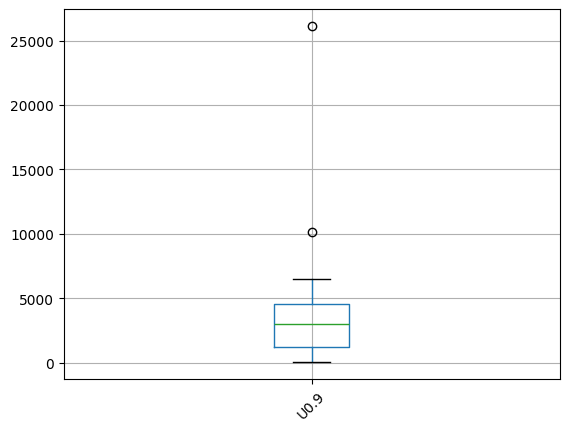

In [5]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
u = 0.9
size_exp = 30

gens_list = []
for i in range(size_exp):
    initial_phrase, gen = generate_phrases(phrase, u, 1e6)
    gens_list.append(gen.get("gen"))

    print(f"Took {gen.get('gen'):,} generations to generate the phrase '{phrase}' from '{initial_phrase}'")

plot_graphs_and_describe([gens_list], [u])

## Variar o valor de u: 0 a 1, incrementos de 0.001(?)

- Relação entre u e o número médio de gerações necessário para se encontrar o alvo (N médio)
- Há um valor ótimo para u?

## Gráficos

- u por MED(N)
- u port L por MED(N) (Se variar L)

Generating phrases for different mutation rates: 
 [0.001, 0.101, 0.201, 0.30100000000000005, 0.401, 0.501, 0.6010000000000001, 0.7010000000000001, 0.801, 0.901, 1.001]


This experiment 0 did not reach the phrase
This experiment 1 did not reach the phrase
This experiment 2 did not reach the phrase
This experiment 3 did not reach the phrase
This experiment 4 did not reach the phrase
This experiment 5 did not reach the phrase
This experiment 6 did not reach the phrase
This experiment 7 did not reach the phrase
This experiment 8 did not reach the phrase
This experiment 9 did not reach the phrase
This experiment 10 did not reach the phrase
This experiment 11 did not reach the phrase
This experiment 12 did not reach the phrase
This experiment 13 did not reach the phrase
This experiment 14 did not reach the phrase
This experiment 15 did not reach the phrase
This experiment 16 did not reach the phrase
This experiment 17 did not reach the phrase
This experiment 18 did not reach the phrase
This experiment 20 did not reach the phrase
This experiment 21 did not reach the phrase
This experiment 22 did not reach the phrase
This experiment 23 did not reach the phras

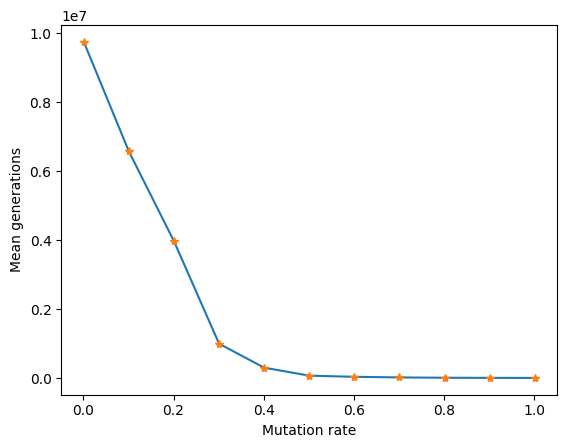

             U0.001        U0.101        U0.201  U0.30100000000000005  \
count  3.000000e+01  3.000000e+01  3.000000e+01          3.000000e+01   
mean   9.744947e+06  6.568599e+06  3.965802e+06          9.952254e+05   
std    1.396982e+06  4.397563e+06  4.482794e+06          2.039969e+06   
min    2.348416e+06  2.027000e+03  3.380000e+02          1.000000e+00   
25%    1.000000e+07  2.616290e+06  5.052500e+04          7.833350e+04   
50%    1.000000e+07  1.000000e+07  1.399602e+06          2.217485e+05   
75%    1.000000e+07  1.000000e+07  1.000000e+07          6.327965e+05   
max    1.000000e+07  1.000000e+07  1.000000e+07          9.232830e+06   

             U0.401         U0.501  U0.6010000000000001  U0.7010000000000001  \
count  3.000000e+01      30.000000            30.000000            30.000000   
mean   3.010074e+05   69521.966667         36366.866667         18862.300000   
std    5.104575e+05  114552.048063         76489.171425         26439.617232   
min    1.877000e+03   

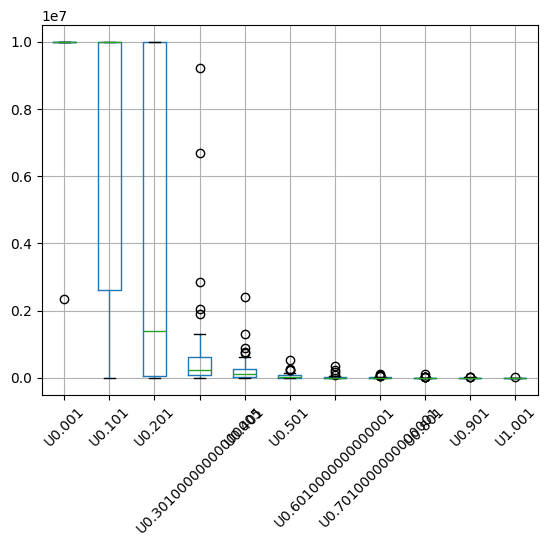

In [6]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 30
step = 0.1
u_list = list(np.arange(0.001, 1, step))

run_exp(u_list, phrase, qntd_exp)

Generating phrases for different mutation rates: 
 [0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.5800000000000001, 0.5900000000000001, 0.6000000000000001, 0.6100000000000001, 0.6200000000000001, 0.6300000000000001, 0.6400000000000001, 0.6500000000000001, 0.6600000000000001, 0.6700000000000002, 0.6800000000000002, 0.6900000000000002, 0.7000000000000002, 0.7100000000000002, 0.7200000000000002, 0.7300000000000002, 0.7400000000000002, 0.7500000000000002, 0.7600000000000002, 0.7700000000000002, 0.7800000000000002, 0.7900000000000003, 0.8000000000000003, 0.8100000000000003, 0.8200000000000003, 0.8300000000000003, 0.8400000000000003, 0.8500000000000003, 0.8600000000000003, 0.8700000000000003, 0.8800000000000003, 0.8900000000000003, 0.9000000000000004, 0.9100000000000004, 0.9200000000000004, 0.9300000000000004, 0.9400000000000004, 0.9500000000000004, 0.9600000000000004, 0.9700000000000004, 0.9800000000000004, 0.9900000000000004]
Mutation rate: 0.50 | Mean generations: 66,069.

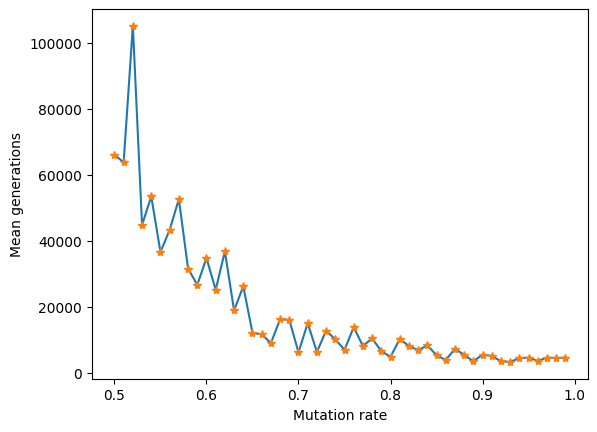

                U0.5         U0.51          U0.52          U0.53  \
count      30.000000      30.00000      30.000000      30.000000   
mean    66069.400000   63798.40000  105191.733333   44785.333333   
std    181580.562186  152280.67347  163409.358058   83412.195435   
min        23.000000      61.00000     549.000000     325.000000   
25%      3861.750000    4002.50000    6341.000000    2092.500000   
50%     14243.000000   14273.00000   28316.000000   10474.500000   
75%     38965.750000   45798.50000   71350.000000   38635.250000   
max    956464.000000  751261.00000  559892.000000  356897.000000   

               U0.54          U0.55          U0.56  U0.5700000000000001  \
count      30.000000      30.000000      30.000000             30.00000   
mean    53446.066667   36564.800000   43313.200000          52627.60000   
std     95485.233548   46558.686038   98040.304018          92400.90985   
min       198.000000       6.000000     141.000000              4.00000   
25%      389

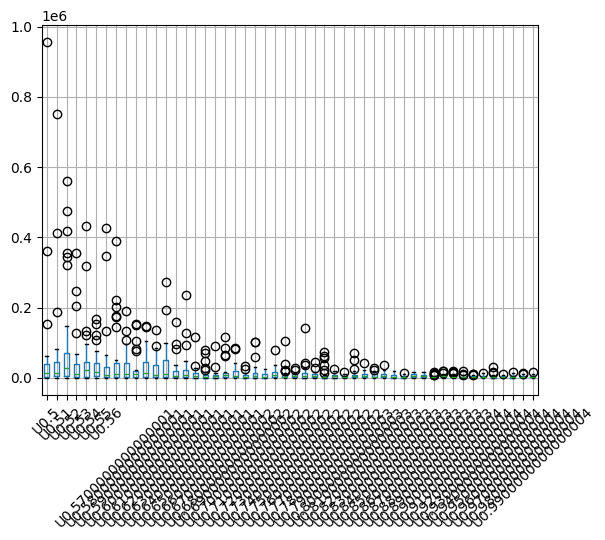

In [10]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 30
step = 0.01
u_list = list(np.arange(0.5, 1, step))

run_exp(u_list, phrase, qntd_exp)

Generating phrases for different mutation rates: 
 [0.8, 0.801, 0.802, 0.803, 0.804, 0.805, 0.806, 0.807, 0.808, 0.809, 0.81, 0.811, 0.812, 0.8130000000000001, 0.8140000000000001, 0.8150000000000001, 0.8160000000000001, 0.8170000000000001, 0.8180000000000001, 0.8190000000000001, 0.8200000000000001, 0.8210000000000001, 0.8220000000000001, 0.8230000000000001, 0.8240000000000001, 0.8250000000000001, 0.8260000000000001, 0.8270000000000001, 0.8280000000000001, 0.8290000000000001, 0.8300000000000001, 0.8310000000000001, 0.8320000000000001, 0.8330000000000001, 0.8340000000000001, 0.8350000000000001, 0.8360000000000001, 0.8370000000000001, 0.8380000000000001, 0.8390000000000001, 0.8400000000000001, 0.8410000000000001, 0.8420000000000001, 0.8430000000000001, 0.8440000000000001, 0.8450000000000001, 0.8460000000000001, 0.8470000000000001, 0.8480000000000001, 0.8490000000000001, 0.8500000000000001, 0.8510000000000001, 0.8520000000000001, 0.8530000000000001, 0.8540000000000001, 0.8550000000000001, 

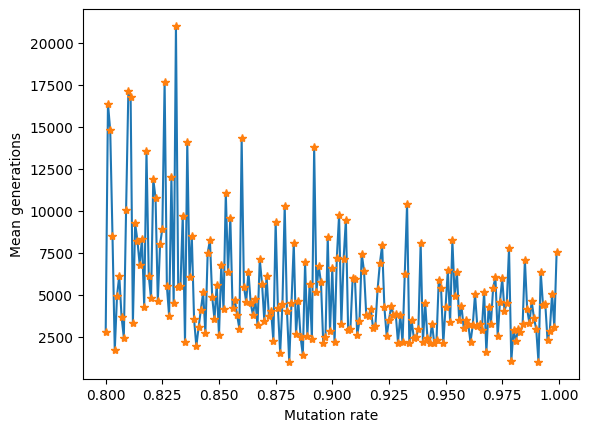

              U0.8        U0.801        U0.802        U0.803       U0.804  \
count     5.000000      5.000000      5.000000      5.000000     5.000000   
mean   2787.000000  16372.400000  14779.400000   8508.800000  1708.800000   
std    2657.278589  25701.174113  15876.636964  12899.941694  1805.653677   
min     377.000000    825.000000    249.000000    299.000000    55.000000   
25%     932.000000   5525.000000   6210.000000   2344.000000   435.000000   
50%    1839.000000   6047.000000  11373.000000   4073.000000   717.000000   
75%    3892.000000   7328.000000  14601.000000   4430.000000  3570.000000   
max    6895.000000  62137.000000  41464.000000  31398.000000  3767.000000   

            U0.805        U0.806       U0.807       U0.808        U0.809  ...  \
count      5.00000      5.000000     5.000000     5.000000      5.000000  ...   
mean    4960.80000   6140.000000  3689.000000  2469.600000  10054.200000  ...   
std     3972.23057   8117.557761  3471.776779  1501.281886  120

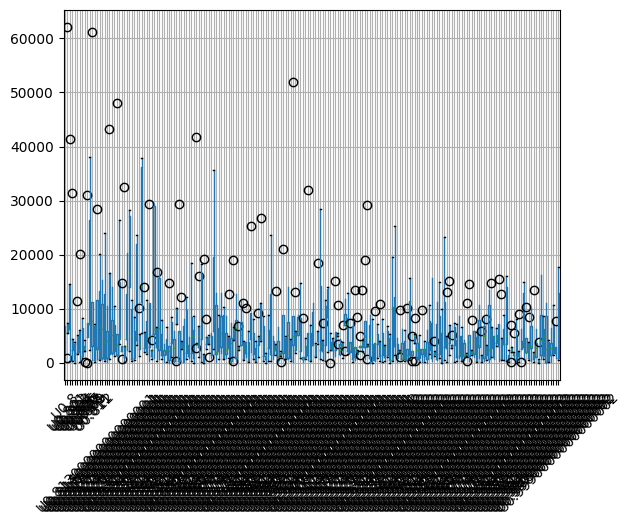

In [8]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 5
step = 0.001
u_list = list(np.arange(0.8, 1, step))

run_exp(u_list, phrase, qntd_exp)